<a href="https://colab.research.google.com/github/nh0875/Desafios-Procesamiento-del-Habla-974/blob/main/Desafio_Regresi%C3%B3n_1_Hilliard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
num_registros = 1000
num_columnas = 4
columnas = [f'Columna_{i}' for i in range(num_columnas - 1)] + ['Variable_Continua']
data = {}
for columna in columnas[:-1]:
    data[columna] = np.random.choice(['Opción_A', 'Opción_B', 'Opción_C'], size=num_registros)
data['Variable_Continua'] = np.random.randn(num_registros)

df = pd.DataFrame(data)
print(df.head())

  Columna_0 Columna_1 Columna_2  Variable_Continua
0  Opción_B  Opción_C  Opción_B           0.126397
1  Opción_B  Opción_C  Opción_B          -0.098057
2  Opción_C  Opción_A  Opción_A           1.267514
3  Opción_A  Opción_B  Opción_C           1.150174
4  Opción_C  Opción_A  Opción_C          -0.527604


## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

In [92]:
# 1. Codificación de variables categóricas
encoder = OneHotEncoder(sparse_output=False)  # Actualización del parámetro
encoded_data = encoder.fit_transform(df[columnas[:-1]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# 2. Escalado de la variable continua
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Variable_Continua']])
scaled_df = pd.DataFrame(scaled_data, columns=['Variable_Continua_scaled'])

# 3. Combinar DataFrames
df_preprocessed = pd.concat([encoded_df, scaled_df], axis=1)

# 4. Dividir en conjunto de entrenamiento y prueba
X = df_preprocessed
y = df['Variable_Continua']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que las columnas sean strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [93]:
# Modelo Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Lasso con alpha=0.1
model_lasso01 = Lasso(alpha=0.1)
model_lasso01.fit(X_train, y_train)
y_pred_lasso01 = model_lasso01.predict(X_test)

# Lasso con alpha=100
model_lasso03 = Lasso(alpha=100)
model_lasso03.fit(X_train, y_train)
y_pred_lasso03 = model_lasso03.predict(X_test)

# Lasso con alpha=50000000000
model_lasso05 = Lasso(alpha=50000000000)
model_lasso05.fit(X_train, y_train)
y_pred_lasso05 = model_lasso05.predict(X_test)


## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

Use MSE para evaluar los errores tambien use la metrica RMSE para evaluar la precisión de las predicciones numéricas, ya que penaliza fuertemente los errores y tambien para complementar MSE. La 3° Metrica que use fue el coeficiente de determinacion (R^2) para evaluar de una forma distinta que tan buenos son los modelos

Metodologias usadas, Cross-Validation (Validacion Cruzada)

In [101]:
# 6. Evaluación de los modelos
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{nombre} - MSE: {mse:.4f}, R2: {r2:.4f}, RMSE: {rmse}')

evaluar_modelo('Linear Regression', y_test, y_pred_linear)
evaluar_modelo('Lasso (alpha=0.1)', y_test, y_pred_lasso01)
evaluar_modelo('Lasso (alpha=100)', y_test, y_pred_lasso03)
evaluar_modelo('Lasso (alpha=50000000000)', y_test, y_pred_lasso05)

Linear Regression - MSE: 0.0000, R2: 1.0000, RMSE: 7.538277666014754e-16
Lasso (alpha=0.1) - MSE: 0.0099, R2: 0.9905, RMSE: 0.09934684654805005
Lasso (alpha=100) - MSE: 1.0389, R2: -0.0052, RMSE: 1.0192418578409335
Lasso (alpha=50000000000) - MSE: 1.0389, R2: -0.0052, RMSE: 1.0192418578409335


Es curioso como el modelo no varia cuando alpha crece significativamente pero si cuando disminuye a valores cercanos al 0


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




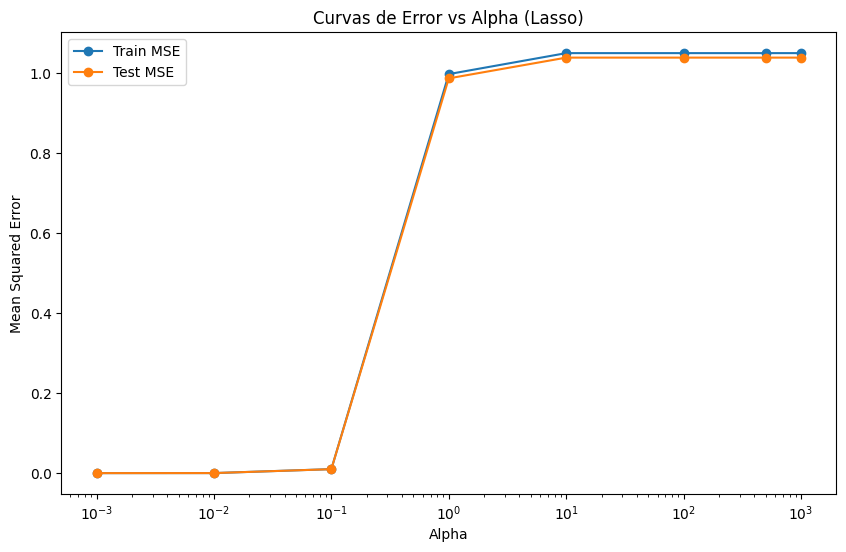

In [102]:
import matplotlib.pyplot as plt

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
train_errors = []
test_errors = []
#Calculo el MSE para cada alpha de la lista alphas
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Graficar MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train MSE', marker='o')
plt.plot(alphas, test_errors, label='Test MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Curvas de Error vs Alpha (Lasso)')
plt.legend()
plt.show()


Como mencione anteriormente el patron de este modelo esta en que cuando los valores de alpha aumentan, el resultado del modelo tiende a ser igual, el valor ideal de alpha a la hora de evaluar nuestro modelo sera "1"

Fuentes:

Gemini prompt= "Crea un dataset de 1000x6 en python, con una variable continua"

Github=https://github.com/danielperhez/P02_PD_Models

Stackoverflow=https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

Material de estudio, tambien los notebooks del campus

Gemini="Show me how to make a Cross-Validation"